In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [36]:
url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv'
df1 = pd.read_csv(url, index_col = 'year', parse_dates=True, infer_datetime_format=True)
# df1 = pd.read_csv(url)
# df1 = df1.set_index('year')
print(df1.shape)  # (123, 8)
df1.head()

(13276, 25)


,country,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,generation,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
year,,,,,,,,,,,,,,,,,,,,,
1985-01-01,Argentina,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,G.I. Generation,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1985-01-01,Argentina,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,G.I. Generation,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1985-01-01,Argentina,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,Silent,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1985-01-01,Argentina,female,55-74 years,210,2304000,9.11,Argentina1985,8.841667e+10,3264,G.I. Generation,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469
1985-01-01,Argentina,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,Boomers,...,0.2384,1.077831e+07,50.156848,0.009469,10732.386792,2.157578,57.6,Americas,ARG,0.009469


In [37]:
df1.columns

Index(['country', 'sex', 'age', 'suicides', 'population', 'sucid_in_hundredk',
       'country-year', 'yearly_gdp', 'gdp_per_capita', 'generation',
       'suicides.1', 'internetusers', 'expenses', 'employeecompensation',
       'unemployment', 'physician_price', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'continent', 'country_code', 'mobilesubscription'],
      dtype='object')

In [38]:
df = df1[(df1.country == 'Russian Federation')]
columns = ['sucid_in_hundredk','gdp_per_capita','lifeexpectancy','expenses']
df = pd.DataFrame(df1, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13276 entries, 1985-01-01 to 2015-01-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sucid_in_hundredk  13276 non-null  float64
 1   gdp_per_capita     13276 non-null  int64  
 2   lifeexpectancy     13276 non-null  float64
 3   expenses           13276 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 518.6 KB


In [39]:
# adding all deaths together and group by year
df = df.groupby(['year'])['sucid_in_hundredk','gdp_per_capita','lifeexpectancy','expenses'].transform('sum')
# df = df.reset_index().drop_duplicates()
# df = pd.Series.to_frame(df)

# df['year'] = pd.to_datetime(df['year'], format='%Y00%').apply(lambda x: x.strftime('%Y'))
df['year'] = list(df.index)
df = df.drop_duplicates()
df = df.drop(labels='year', axis=1)
df.tail(10)

<ipython-input-39-adde1a2a424f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['year'])['sucid_in_hundredk','gdp_per_capita','lifeexpectancy','expenses'].transform('sum')


,sucid_in_hundredk,gdp_per_capita,lifeexpectancy,expenses
year,,,,
2007-01-01,5943.61,14148912,35863.404292,13315.794426
2008-01-01,6011.15,15385368,35975.043512,14033.973874
2009-01-01,5867.99,13687092,36106.946342,15130.091474
2010-01-01,5800.77,14294664,36232.397268,15235.156219
2011-01-01,5578.44,15867408,36426.280976,14903.459009
2012-01-01,5692.10,15338880,36497.082732,14959.589877
2013-01-01,5287.79,15735684,35764.623220,14587.779565
2014-01-01,5174.47,14550744,22269.640636,8927.884727
2015-01-01,4476.67,11243316,19862.111919,7962.708000


In [40]:
df.isnull().sum()
df.isna().sum()

sucid_in_hundredk    0
gdp_per_capita       0
lifeexpectancy       0
expenses             0
dtype: int64

In [41]:
# Replace the NaNs in column S2 & S3 by the mean of values
# in column S2 & S3 respectively
df[['lifeexpectancy','expenses']] = df[['lifeexpectancy','expenses']].fillna(value=df[['lifeexpectancy','expenses']].mean())

In [42]:
df['lifeexpectancy'] = df['lifeexpectancy'].replace(0, 
df['lifeexpectancy'].median())

df['expenses'] = df['expenses'].replace(0, 
df['expenses'].median())

In [43]:
df.isnull().sum()
df.isna().sum()

sucid_in_hundredk    0
gdp_per_capita       0
lifeexpectancy       0
expenses             0
dtype: int64

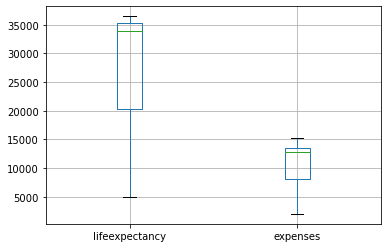

In [44]:
boxplot = df.boxplot(column=['lifeexpectancy','expenses']) 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


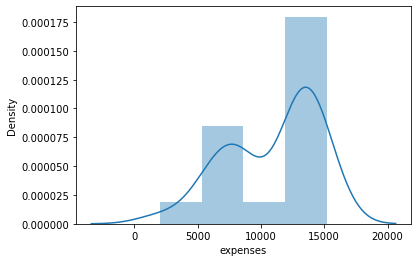

In [45]:
import seaborn as sns, numpy as np
ax = sns.distplot(df['expenses'])

In [46]:
df.head()

,sucid_in_hundredk,gdp_per_capita,lifeexpectancy,expenses
year,,,,
1985-01-01,3655.13,1816848,13241.407946,5308.472000
1986-01-01,3930.40,2546796,13843.290125,5549.766182
1987-01-01,5035.65,3611844,16250.818842,6514.942909
1988-01-01,4733.78,4048896,15648.936663,6273.648727
1989-01-01,5208.18,4218240,16852.701022,6756.237091


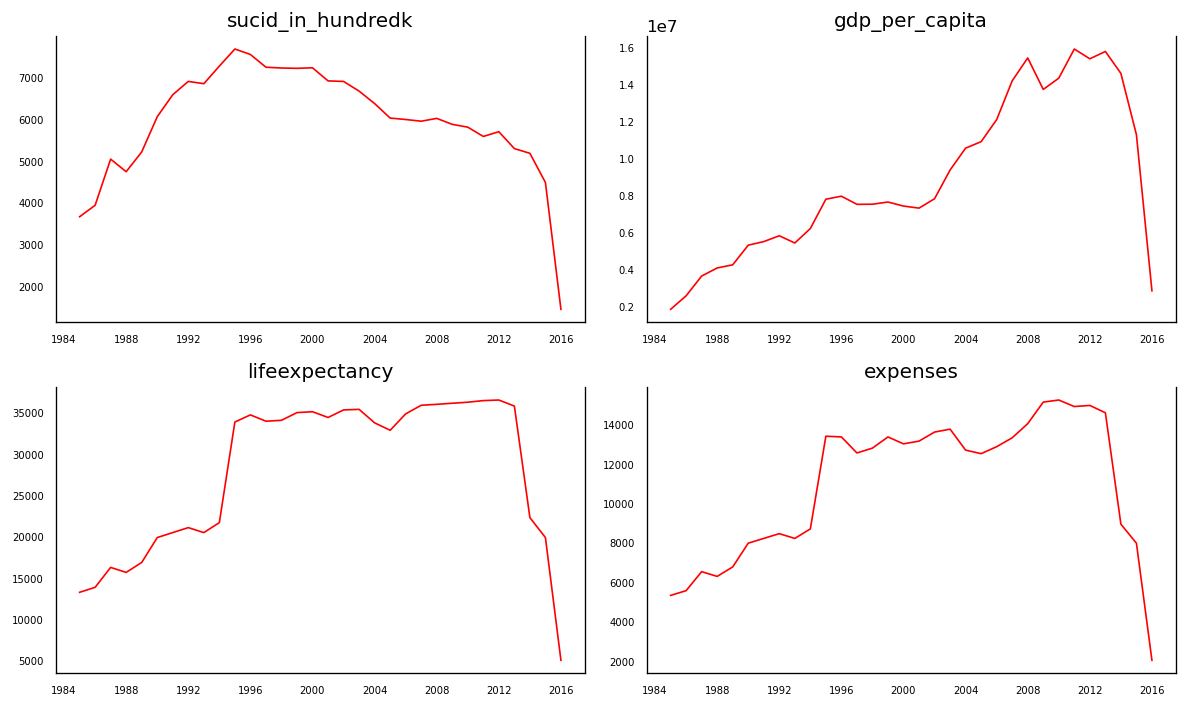

In [47]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Testing Causation using Granger’s Causality Test

In [48]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=9
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,sucid_in_hundredk_x,gdp_per_capita_x,lifeexpectancy_x,expenses_x
sucid_in_hundredk_y,1.0000,0.0,0.0,0.0
gdp_per_capita_y,0.0003,1.0,0.0,0.0
lifeexpectancy_y,0.0000,0.0,1.0,0.0
expenses_y,0.0000,0.0,0.0,1.0


If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

### Cointegration Test

In [49]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
sucid_in_hundredk ::  nan       > 40.1749   =>   False
gdp_per_capita ::  nan       > 24.2761   =>   False
lifeexpectancy ::  91.52     > 12.3212   =>   True
expenses ::  42.04     > 4.1296    =>   True


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:650: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:652: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1-a[i])


In [50]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(27, 4)
(5, 4)


Dickey-Fuller Test

In [51]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [52]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "sucid_in_hundredk" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5072
 No. Lags Chosen       = 8
 Critical value 1%     = -3.859
 Critical value 5%     = -3.042
 Critical value 10%    = -2.661
 => P-Value = 0.0078. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gdp_per_capita" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.6882
 No. Lags Chosen       = 2
 Critical value 1%     = -3.738
 Critical value 5%     = -2.992
 Critical value 10%    = -2.636
 => P-Value = 0.9896. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [53]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [54]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "sucid_in_hundredk" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7267
 No. Lags Chosen       = 9
 Critical value 1%     = -3.924
 Critical value 5%     = -3.068
 Critical value 10%    = -2.674
 => P-Value = 0.0695. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "gdp_per_capita" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3404
 No. Lags Chosen       = 2
 Critical value 1%     = -3.753
 Critical value 5%     = -2.998
 Critical value 10%    = -2.639
 => P-Value = 0.1593. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 

In [55]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [56]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "sucid_in_hundredk" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0177
 No. Lags Chosen       = 7
 Critical value 1%     = -3.889
 Critical value 5%     = -3.054
 Critical value 10%    = -2.667
 => P-Value = 0.7467. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "gdp_per_capita" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9367
 No. Lags Chosen       = 1
 Critical value 1%     = -3.753
 Critical value 5%     = -2.998
 Critical value 10%    = -2.639
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has

In [57]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [58]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "sucid_in_hundredk" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3046
 No. Lags Chosen       = 8
 Critical value 1%     = -3.964
 Critical value 5%     = -3.085
 Critical value 10%    = -2.682
 => P-Value = 0.1705. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "gdp_per_capita" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.5625
 No. Lags Chosen       = 2
 Critical value 1%     = -3.788
 Critical value 5%     = -3.013
 Critical value 10%    = -2.646
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has

In [59]:
model = VAR(df_differenced)
for i in [1,2,3]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  70.62220420001533
BIC :  71.60959047473634
FPE :  4.820376246845361e+30
HQIC:  70.87052908052797 

Lag Order = 2
AIC :  69.52155800833837
BIC :  71.3069002047429
FPE :  1.91062293694877e+30
HQIC:  69.94213094581319 

Lag Order = 3
AIC :  66.9908016540335
BIC :  69.57723816649151
FPE :  2.860879046636642e+29
HQIC:  67.55212458793058 



c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [60]:
model.select_order(3)
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 08, Jun, 2022
Time:                     11:43:05
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    69.5772
Nobs:                     21.0000    HQIC:                   67.5521
Log likelihood:          -770.594    FPE:                2.86088e+29
AIC:                      66.9908    Det(Omega_mle):     4.16352e+28
--------------------------------------------------------------------
Results for equation sucid_in_hundredk
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -7.307751        56.220354           -0.130           0.897
L1.sucid_in_hundredk        -0.182328         0.281278           -0.648           0.517
L1.gdp_per_capita   

### Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [61]:
def adjust(val, length= 6): return str(val).ljust(length)

In [62]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

sucid_in_hundredk : 1.87
gdp_per_capita : 0.98
lifeexpectancy : 1.35
expenses : 1.17


### The serial correlation seems quite alright. Let’s proceed with the forecast.

In [63]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3


array([[-3.18950000e+02, -2.07902400e+06,  9.48014341e+02,
         1.11606757e+02],
       [ 2.86640000e+02,  5.24058000e+06, -2.67155132e+01,
        -1.36899101e+03],
       [-2.31050000e+02, -1.34067600e+06,  7.48846844e+01,
         5.54290901e+02]])

### Forecast VAR model using statsmodels

In [64]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,sucid_in_hundredk_2d,gdp_per_capita_2d,lifeexpectancy_2d,expenses_2d
year,,,,
2012-01-01,459.848422,-4.009589e+06,-6809.062836,-18.581972
2013-01-01,-277.592965,9.034306e+04,19226.602911,5163.340114
2014-01-01,-288.957321,7.321359e+06,-18047.286777,-9320.048121
2015-01-01,130.036755,-1.857867e+06,1618.678062,3118.007939
2016-01-01,748.978470,-1.067062e+07,1429.859906,4953.871108


In [65]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

### Invert the transformation to get the real forecast

In [66]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['sucid_in_hundredk_2d', 'gdp_per_capita_2d', 'lifeexpectancy_2d','expenses_2d']]

,sucid_in_hundredk_2d,gdp_per_capita_2d,lifeexpectancy_2d,expenses_2d
year,,,,
2012-01-01,459.848422,-4.009589e+06,-6809.062836,-18.581972
2013-01-01,-277.592965,9.034306e+04,19226.602911,5163.340114
2014-01-01,-288.957321,7.321359e+06,-18047.286777,-9320.048121
2015-01-01,130.036755,-1.857867e+06,1618.678062,3118.007939
2016-01-01,748.978470,-1.067062e+07,1429.859906,4953.871108


### Plot of Forecast vs Actuals

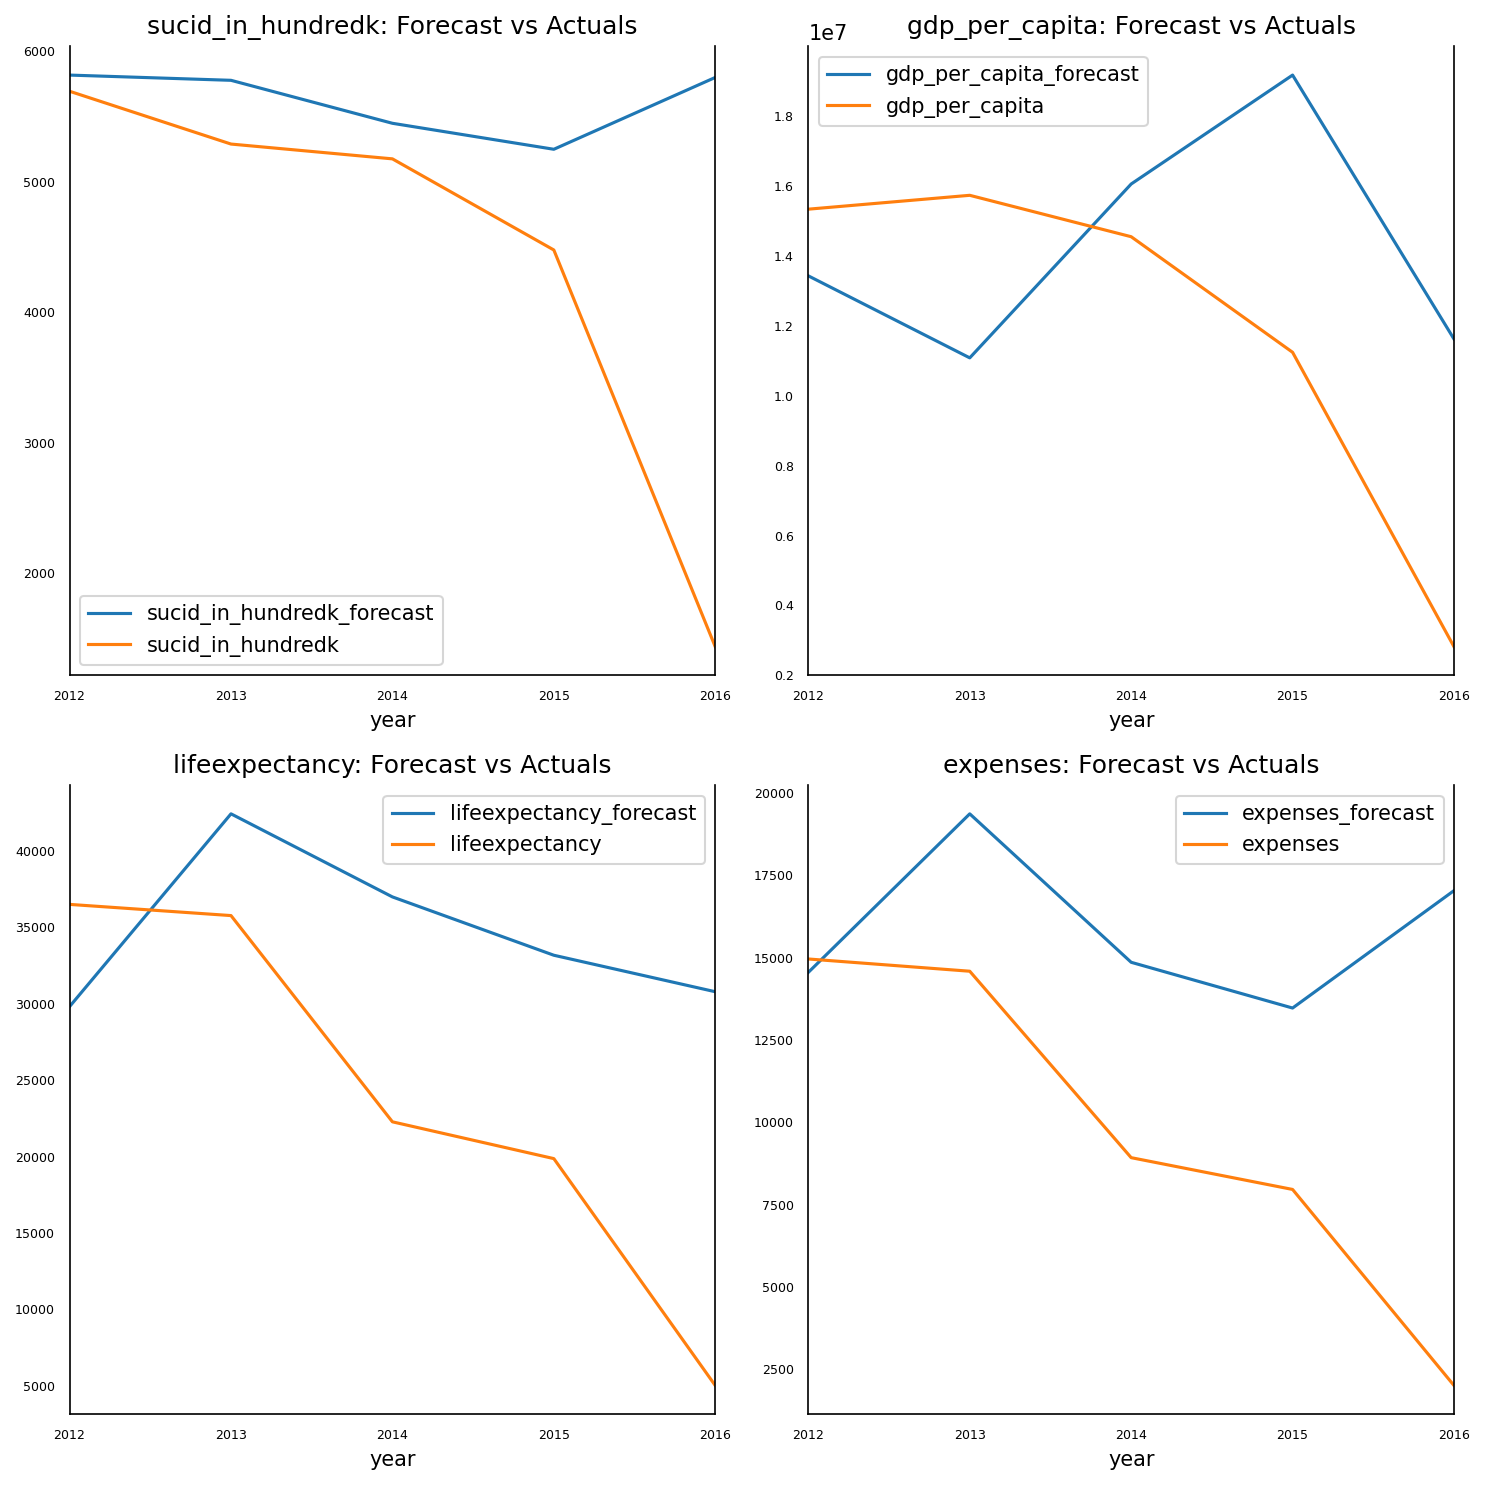

In [67]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Evaluate the Forecasts

In [68]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: gdp_per_capita')
accuracy_prod = forecast_accuracy(df_results['gdp_per_capita_forecast'].values, df_test['gdp_per_capita'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: lifeexpectancy')
accuracy_prod = forecast_accuracy(df_results['lifeexpectancy_forecast'].values, df_test['lifeexpectancy'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: sucid_in_hundredk')
accuracy_prod = forecast_accuracy(df_results['sucid_in_hundredk_forecast'].values, df_test['sucid_in_hundredk'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: expenses')
accuracy_prod = forecast_accuracy(df_results['expenses_forecast'].values, df_test['expenses'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: gdp_per_capita
mape   :  0.8708
me     :  2337090.5241
mae    :  4961066.6444
mpe    :  0.7028
rmse   :  5796573.8089
corr   :  0.1443
minmax :  0.337

Forecast Accuracy of: lifeexpectancy
mape   :  1.3675
me     :  10752.5554
mae    :  13426.9478
mpe    :  1.2942
rmse   :  15143.4315
corr   :  0.3972
minmax :  0.3953

Forecast Accuracy of: sucid_in_hundredk
mape   :  0.6739
me     :  1202.9923
mae    :  1202.9923
mpe    :  0.6739
rmse   :  1996.3575
corr   :  -0.1687
minmax :  0.2109

Forecast Accuracy of: expenses
mape   :  1.8365
me     :  6167.0735
mae    :  6329.6375
mpe    :  1.8257
rmse   :  7927.7401
corr   :  0.1224
minmax :  0.3928


<ipython-input-68-a303ee047472>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-68-a303ee047472>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
